# Evaluation of the model

In [1]:
%matplotlib inline
from tensorflow import keras
import matplotlib.pyplot as plt
import csv
FOLDER = "data/"

## Plot the loss accuracy curves

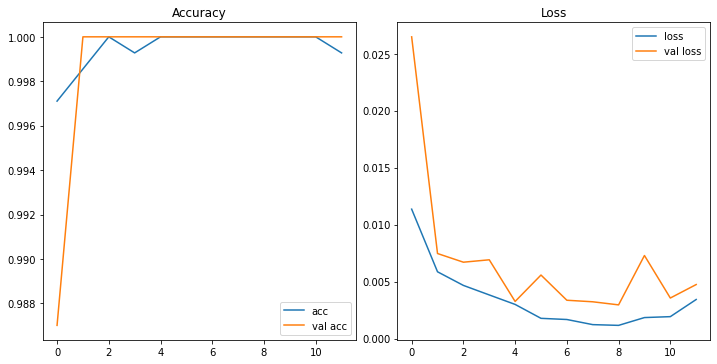

In [4]:
val_loss = []
loss = []
acc = []
val_acc = []

with open('history.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')
        eliminator = 0
        for row in csv_reader:
            if eliminator!=0:    
                acc.append(float(row[1]))
                loss.append(float(row[2]))
                val_acc.append(float(row[3]))
                val_loss.append(float(row[4]))
            eliminator = eliminator + 1

fig, axs = plt.subplots(1,2, figsize = (10,5))
fig.tight_layout()
axs[0].plot(acc, label = "acc")
axs[0].plot(val_acc, label = "val acc")
axs[0].set_title("Accuracy")
axs[0].legend()

axs[1].plot(loss, label = "loss")
axs[1].plot(val_loss, label = "val loss")
axs[1].set_title("Loss")
axs[1].legend()
